In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('LearningCurveData.csv',index_col = 0)

In [3]:
df

,index,0,1,2,3,4,5,6,7,8,...,391,392,393,394,395,396,397,398,399,final_result
0,0,773.921082,718.580933,667.866821,621.421631,578.884949,540.020142,504.535858,472.185333,442.770721,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170.942551
1,0,786.076233,741.083313,699.049561,659.792908,623.179199,589.003174,557.168579,527.534119,499.916534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167.232773
2,0,778.297485,726.624573,678.919006,634.904053,594.334961,556.918701,522.532410,490.889343,461.839813,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.836639
3,0,795.020508,757.907349,722.780762,689.540710,658.097351,628.381409,600.277100,573.726074,548.648010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,163.039749
4,0,757.095581,688.052368,626.309326,571.195007,522.045166,478.337372,439.569427,405.257660,374.978119,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152.599945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3720,0,597.107178,550.947144,508.768311,470.243561,435.105164,403.086914,373.943634,347.441071,323.405487,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.328766
3721,0,601.440735,558.906250,519.729248,483.666138,450.505310,420.019684,392.040009,366.363953,342.864563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113.902420
3722,0,613.840881,582.014709,552.012695,523.749146,497.112793,472.031128,448.416901,426.201385,405.310211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119.003632
3723,0,609.727661,574.314514,541.178345,510.192444,481.214325,454.144470,428.867706,405.269318,383.251190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111.391426


In [4]:
np.median(df['final_result'])

172.0050048828125

In [5]:
np.std(df['final_result'])

47.02958587450688

In [6]:
data_x = df.iloc[:,1:50]
data_y = df.iloc[:,-1]

In [7]:
data_x

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,773.921082,718.580933,667.866821,621.421631,578.884949,540.020142,504.535858,472.185333,442.770721,416.016785,...,193.540405,192.773773,192.083984,191.466782,190.849487,190.177658,189.634796,189.102509,188.604980,188.151718
1,786.076233,741.083313,699.049561,659.792908,623.179199,589.003174,557.168579,527.534119,499.916534,474.240051,...,199.823532,198.253815,196.860855,195.551437,194.432770,193.306763,192.255417,191.285141,190.459656,189.730957
2,778.297485,726.624573,678.919006,634.904053,594.334961,556.918701,522.532410,490.889343,461.839813,435.218262,...,191.551636,190.467026,189.580505,188.691895,187.913635,187.162659,186.408539,185.823120,185.246902,184.734085
3,795.020508,757.907349,722.780762,689.540710,658.097351,628.381409,600.277100,573.726074,548.648010,524.989136,...,218.829544,216.070206,213.567215,211.273773,209.113937,207.120697,205.323792,203.676041,202.083603,200.609909
4,757.095581,688.052368,626.309326,571.195007,522.045166,478.337372,439.569427,405.257660,374.978119,348.268372,...,176.855713,176.113693,175.621887,175.082733,174.519714,174.158417,173.689590,173.252792,172.866119,172.555603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3720,597.107178,550.947144,508.768311,470.243561,435.105164,403.086914,373.943634,347.441071,323.405487,301.595123,...,127.639824,127.159058,126.721664,126.334473,125.949646,125.611717,125.314507,125.002991,124.716377,124.450981
3721,601.440735,558.906250,519.729248,483.666138,450.505310,420.019684,392.040009,366.363953,342.864563,321.357635,...,131.980560,131.316284,130.736359,130.244415,129.733002,129.260895,128.873978,128.522629,128.177185,127.864799
3722,613.840881,582.014709,552.012695,523.749146,497.112793,472.031128,448.416901,426.201385,405.310211,385.670044,...,145.605194,143.792923,142.133026,140.623016,139.239822,137.968384,136.824127,135.757278,134.784409,133.902130
3723,609.727661,574.314514,541.178345,510.192444,481.214325,454.144470,428.867706,405.269318,383.251190,362.730377,...,137.750565,136.396042,135.254150,134.201263,133.228943,132.381531,131.591171,130.871078,130.223648,129.645279


In [8]:
X_train, X_test, y_train, y_test = train_test_split( data_x, data_y, test_size=0.33, random_state=42)

In [8]:
#model building
gbr = GradientBoostingRegressor(n_estimators=3000, max_leaf_nodes=10) 
gbr.fit(X_train, y_train )

GradientBoostingRegressor(max_leaf_nodes=10, n_estimators=3000)

In [11]:
gbr.feature_importances_

array([2.01074818e-03, 3.72118830e-04, 5.90749910e-04, 8.82749460e-04,
       9.26926267e-04, 3.07920901e-04, 3.05261956e-04, 1.75693365e-04,
       6.51655160e-04, 6.30517333e-04, 8.84405716e-04, 6.61733991e-04,
       2.33677783e-04, 6.69889332e-04, 8.33575805e-04, 2.20601818e-04,
       2.51652118e-04, 4.28394226e-04, 5.81127963e-04, 2.95264673e-04,
       3.10523946e-04, 1.71242887e-04, 1.67061029e-04, 1.40620736e-04,
       1.35419126e-04, 1.41074589e-04, 1.28306891e-04, 2.03826293e-04,
       1.31745848e-04, 1.37829733e-04, 1.24584686e-04, 5.77776107e-05,
       1.17990193e-04, 1.08037902e-04, 8.63428811e-05, 9.28355635e-05,
       8.89616748e-05, 7.66724122e-05, 1.25259174e-04, 8.25512071e-05,
       1.20997148e-04, 7.08081867e-05, 1.75039240e-04, 1.26273407e-03,
       1.98705748e-04, 2.14070995e-04, 8.85553628e-03, 1.64450689e-01,
       8.10108090e-01])

In [12]:
y_pred = gbr.predict(X_test)

In [25]:
np.mean(abs(y_test-y_pred))
mean_absolute_error(y_test,y_pred)

3.438374107932789

In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [15]:
print(r2_score(y_test,y_pred))

0.9900055484124431


In [16]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
212,596.748352,550.153625,507.659637,468.933136,433.685394,401.629852,372.516693,346.120300,322.237091,300.670746,...,133.335754,132.928131,132.537247,132.140045,131.839722,131.476273,131.189499,130.904800,130.646530,130.410583
1036,700.928833,666.490784,633.949280,603.210327,574.181946,546.781067,520.931396,496.549866,473.569885,451.905060,...,178.106750,175.838898,173.679688,171.699371,169.901123,168.284348,166.783905,165.411407,164.127563,162.914429
3603,1422.217896,1295.553345,1181.563843,1079.061035,986.997620,904.426819,830.495789,764.395813,705.405090,653.017517,...,297.849457,297.085419,296.294006,295.626892,294.949799,294.326538,293.693146,293.091980,292.442932,291.929504
900,691.540833,639.670471,592.294800,549.031433,509.619629,473.743286,441.094543,411.452332,384.598022,360.347137,...,169.470581,168.962448,168.445892,168.025726,167.603775,167.249603,166.884521,166.553436,166.271210,165.989410
3293,879.094055,826.276184,777.059998,731.234009,688.589417,648.886902,611.993530,577.717346,545.898621,516.401306,...,213.521317,211.959167,210.566559,209.305450,208.154846,207.134689,206.124146,205.229416,204.435608,203.688202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,821.248596,755.068298,695.015564,640.532471,591.200378,546.555420,506.236084,469.882385,437.206329,407.843262,...,192.045654,191.564148,191.138428,190.735718,190.274384,189.945419,189.579132,189.278870,188.998199,188.705475
1294,1510.072632,1435.429077,1364.998535,1298.540405,1235.886719,1176.836060,1121.172485,1068.764038,1019.447998,973.046387,...,400.711548,396.186523,392.086243,388.343109,384.904144,381.750336,378.850464,376.193939,373.757843,371.512482
860,976.793152,930.460449,886.607727,845.105347,805.840149,768.683655,733.574341,700.385803,669.016907,639.398010,...,252.683990,249.165222,245.810028,242.754623,239.927475,237.355118,234.967712,232.779861,230.775528,228.925110
3507,822.252869,750.248230,686.154236,629.250244,578.849182,534.348267,495.157532,460.723877,430.672333,404.525879,...,247.161255,246.639633,246.154556,245.643723,245.289734,244.928604,244.629730,244.226212,243.948761,243.589859


In [17]:
#conscruct random forest model with grid search
grid_values = {'max_features': np.linspace(1,49,49, dtype='int32'),
              'random_state': [88]} 
rf = RandomForestRegressor() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, scoring='neg_mean_absolute_error', cv=10)
rf_cv.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int32),
                         'random_state': [88]},
             scoring='neg_mean_absolute_error')

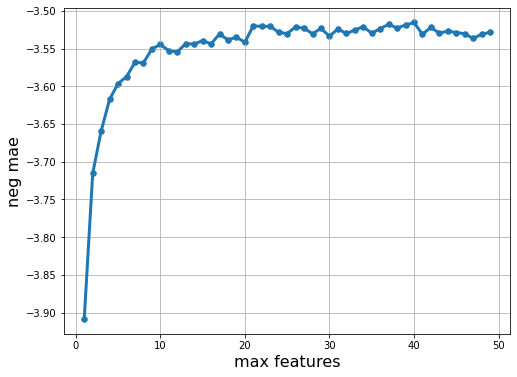

In [45]:
max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('neg mae', fontsize=16)
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')

In [19]:
rf_cv.best_params_

{'max_features': 40, 'random_state': 88}

In [20]:
# predict on test set and calculate accuracy
rf_pred = rf_cv.best_estimator_.predict(X_test )
print('r2: {:.3f}'.format(r2_score(y_test, rf_pred)))
print(np.mean(abs(y_test-rf_pred)))

r2: 0.990
3.423840623933126


Save Model

In [21]:
import pickle

In [23]:
filename = 'random_forest.sav'
pickle.dump(rf_cv.best_estimator_, open(filename, 'wb'))

Bootstrap to see model variance

In [30]:
def bootstrap_validation(test_data, test_label, train_label, model, metrics_list, sample=500, random_state=66):
    #tic = time.time()
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter]=metrics(bs_predicted,bs_label,train_label)
#         if bs_iter % 100 == 0:
#             print(bs_iter, time.time()-tic)
    output_df = pd.DataFrame(output_array)
    return output_df

def mean_absolute_error(predictions, y_test,y_train):
    MAE = np.mean(np.abs(y_test-predictions))
    return MAE

In [28]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
554,848.041687,771.191650,702.349426,640.630249,585.500793,536.307251,492.440308,453.528992,419.070801,388.588623,...,189.734192,189.238815,188.795944,188.428757,188.024811,187.631165,187.218170,186.884933,186.585373,186.368591
3373,960.516968,893.021667,831.116333,774.398315,722.479980,675.016602,631.695190,592.188232,556.284241,523.661865,...,257.745575,256.994965,256.271301,255.668640,255.094055,254.578384,254.128815,253.678970,253.295364,252.934006
3600,1456.235596,1357.665527,1266.532104,1182.323730,1104.541626,1032.764038,966.547119,905.521973,849.348633,797.607544,...,312.776093,310.880188,309.108002,307.476776,306.117279,304.845428,303.718536,302.658295,301.747864,300.895660
2666,649.488647,612.170654,577.408936,545.052917,514.992920,487.059753,461.133026,437.122772,414.833588,394.251251,...,190.460876,189.477493,188.661392,187.921707,187.261169,186.627304,186.085617,185.580856,185.139572,184.724747
1406,705.307373,646.902100,594.085999,546.398560,503.399719,464.685913,429.887817,398.706787,370.811707,345.949585,...,171.375336,170.966919,170.549469,170.178146,169.903412,169.612823,169.291122,169.026047,168.763718,168.479843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,849.041138,796.914429,748.739868,704.209412,663.083862,625.196472,590.268066,558.157104,528.627197,501.541168,...,252.917892,251.820663,250.743637,249.827194,248.988022,248.210297,247.506134,246.863297,246.281662,245.727219
2987,701.070984,636.982788,579.819580,528.949890,483.750427,443.698090,408.287689,377.115234,349.720551,325.785004,...,183.654617,183.311462,183.065704,182.762466,182.470398,182.189865,181.946960,181.707870,181.462479,181.214920
1978,626.486572,578.292969,534.361389,494.381012,458.017883,425.017822,395.090942,368.018433,343.567749,321.557648,...,156.213104,155.832611,155.481430,155.192383,154.918869,154.677979,154.461121,154.242920,154.041290,153.865005
2249,544.043091,518.867554,495.096191,472.656219,451.486786,431.510834,412.695984,394.981110,378.300934,362.618896,...,172.005859,170.583496,169.243469,168.034439,166.936050,165.927124,164.985016,164.131058,163.332275,162.619980


In [33]:
bs_output = bootstrap_validation(X_test,y_test,y_train,rf_cv.best_estimator_,
                                 metrics_list=[mean_absolute_error],
                                 sample = 5000)

(5000, 1)


In [34]:
bs_output

,0
0,3.411768
1,3.450328
2,3.587335
3,3.374423
4,3.388381
...,...
4995,3.284746
4996,3.524460
4997,3.389743
4998,3.385084


In [39]:
# The 95% confidence interval
CI= np.quantile(bs_output.iloc[:,0],np.array([0.025,0.975]))
print('mean', np.mean(bs_output))
print('std',np.std(bs_output))
print("The 95-percent confidence interval of MAE is %s" % CI)

mean 0    3.421384
dtype: float64
std 0    0.08654
dtype: float64
The 95-percent confidence interval of MAE is [3.24954868 3.59215511]


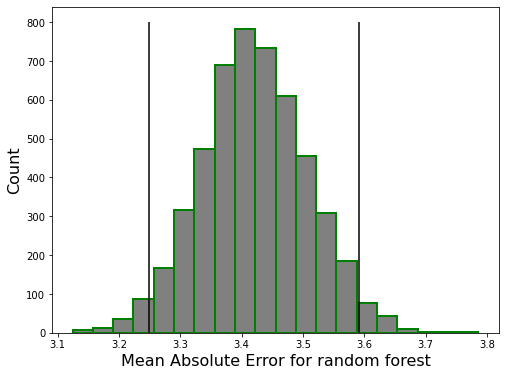

In [40]:
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Mean Absolute Error for random forest', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs.vlines(x=CI[0], ymin = 0, ymax =800, color = "black")
axs.vlines(x=CI[1], ymin = 0, ymax =800, color = "black")

In [41]:
bs_output_boost = bootstrap_validation(X_test,y_test,y_train,gbr,
                                 metrics_list=[mean_absolute_error],
                                 sample = 5000)

(5000, 1)


In [42]:
# The 95% confidence interval
CI= np.quantile(bs_output_boost.iloc[:,0],np.array([0.025,0.975]))
print('mean', np.mean(bs_output_boost))
print('std',np.std(bs_output_boost))
print("The 95-percent confidence interval of MAE is %s" % CI)

mean 0    3.437663
dtype: float64
std 0    0.088657
dtype: float64
The 95-percent confidence interval of MAE is [3.26622893 3.61728221]


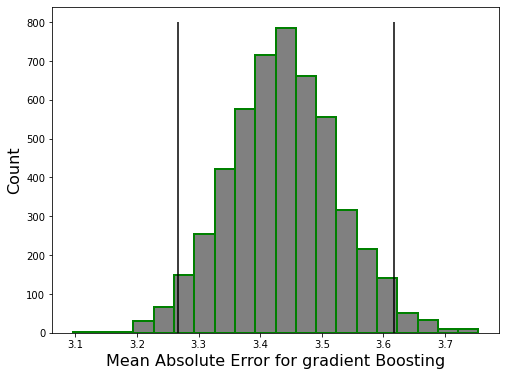

In [43]:
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Mean Absolute Error for gradient Boosting', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output_boost.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs.vlines(x=CI[0], ymin = 0, ymax =800, color = "black")
axs.vlines(x=CI[1], ymin = 0, ymax =800, color = "black")

see the tradeoff between iterations and model performance

In [77]:
ite = []
mae = []
for i in range(2,51):
    ite.append(i)
    data_x = df.iloc[:,1:i]
    data_y = df.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split( data_x, data_y, test_size=0.33, random_state=42)
    gbr = GradientBoostingRegressor(n_estimators=3000, max_leaf_nodes=10) 
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    mae.append(np.mean(abs(y_test-y_pred)))

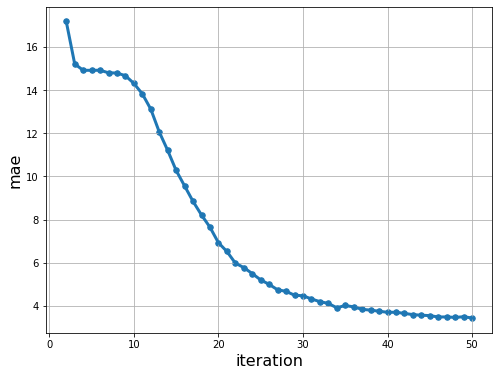

In [79]:
plt.figure(figsize=(8, 6))
plt.xlabel('iteration', fontsize=16)
plt.ylabel('mae', fontsize=16)
plt.scatter(ite, mae, s=30)
plt.plot(ite, mae, linewidth=3)
plt.grid(True, which='both')